# Prediction model for predicting Price

### Importing Python libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print ("Importing libraries is sucessful")

Importing libraries is sucessful


In [2]:
start = time.time()

### Loading Toyota Corolla dataset

In [3]:
corolla = pd.read_csv("ToyotaCorolla.csv", encoding='unicode_escape')
print ("Loading data is sucessful")

Loading data is sucessful


### Preliminary data exploration and data preprocessing

In [4]:
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
corolla.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
corolla.shape

(1436, 38)

In [7]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

#### Identification of missing values in the dataset

In [8]:
corolla.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

#### Identification of duplicate values in the dataset

In [9]:
corolla.duplicated().sum()

0

#### Exploratory data analysis

In [10]:
corolla.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Visualisations

##### Distribution  plot for Price

<Figure size 800x600 with 0 Axes>

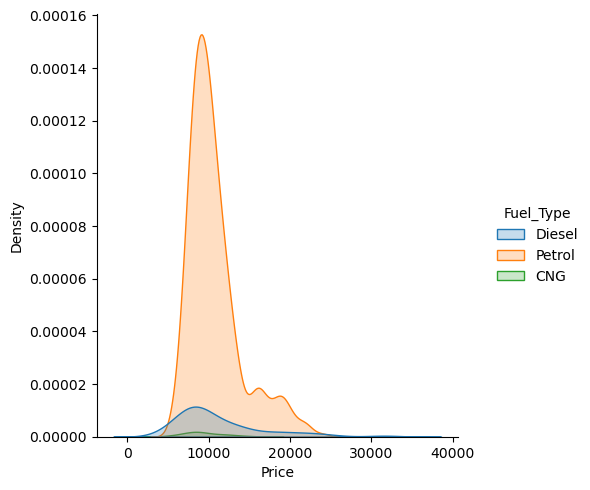

In [11]:
plt.figure(figsize = (8,6))
sns.displot(data = corolla, x = 'Price', hue = 'Fuel_Type', kind = 'kde', fill = True)
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/Corolla/Density plot.png")
plt.show()

##### Kilometers for different fuel type

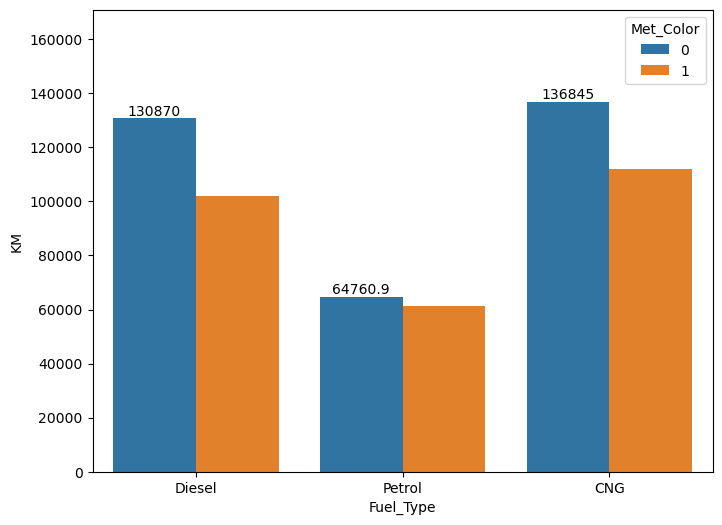

In [12]:
plt.figure(figsize = (8,6))
ax = sns.barplot(data = corolla, x = 'Fuel_Type', y = 'KM', hue="Met_Color", errwidth = 0)
ax.bar_label(ax.containers[0], fontsize=10);
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/Corolla/Bar plot for Km across Fuel type.png")
plt.show()

##### Scatter plot between Price and Horse Power

<Figure size 800x600 with 0 Axes>

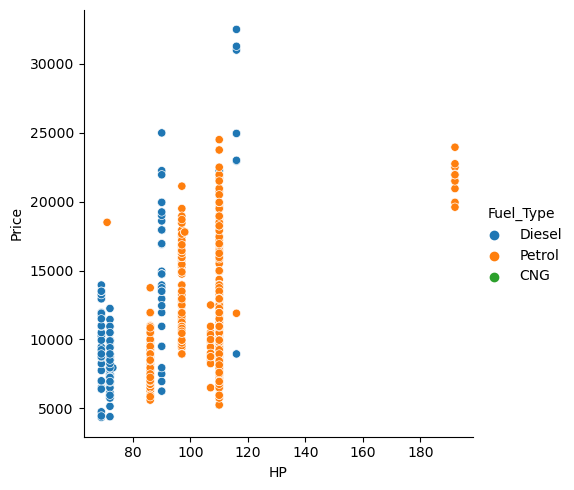

In [13]:
plt.figure(figsize = (8,6))
sns.relplot(data = corolla, x = 'HP', y = 'Price', hue = 'Fuel_Type')
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/Corolla/Price Vs. Horse Power.png")
plt.show()

##### Correlation Heatmap

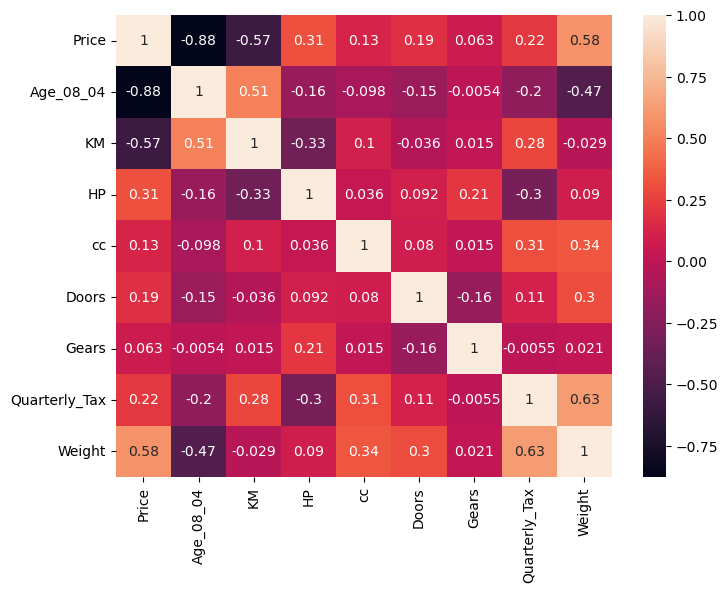

In [14]:
num_col = corolla [['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
plt.figure(figsize = (8,6))
sns.heatmap(data = num_col.corr(), annot = True)
plt.savefig("D:/Top Mentor_Data analytics class/11-08-2024/Assignment/Corolla/Heatmap.png")
plt.show()

### Multiple Linear Regression Model

In [15]:
X = corolla [['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]

In [16]:
y = corolla ['Price']

#### Model1: 80-20% split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [18]:
X_train.shape

(1148, 8)

In [19]:
X_test.shape

(288, 8)

In [20]:
model1 = LinearRegression()

In [21]:
model1.fit(X_train, y_train)

LinearRegression()

In [22]:
coefficient = model1.coef_
coefficient

array([-1.23108296e+02, -2.16680649e-02,  3.28818244e+01, -7.94276925e-02,
        3.71339377e+01,  6.76725313e+02,  5.36967402e+00,  1.51915840e+01])

In [23]:
intercept = model1.intercept_
intercept

-4423.476271799747

In [24]:
model1_pred = model1.predict(X_test)

In [25]:
model1_r2 = r2_score(y_test, model1_pred)
print ("The R-square value is: ", model1_r2)

The R-square value is:  0.866250784363839


#### Model2: 70-30% split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [27]:
X_train.shape

(1005, 8)

In [28]:
X_test.shape

(431, 8)

In [29]:
model2 = LinearRegression()

In [30]:
model2.fit(X_train, y_train)

LinearRegression()

In [31]:
coefficient = model2.coef_
coefficient

array([-1.19799150e+02, -2.16523950e-02,  3.14001087e+01, -1.05870876e-01,
        3.66833318e+01,  6.65548650e+02,  3.95577516e+00,  1.76927904e+01])

In [32]:
intercept = model2.intercept_
intercept

-6909.749405548169

In [33]:
model2_pred = model2.predict(X_test)

In [34]:
model2_r2 = r2_score(y_test, model2_pred)
print ("The R-square value is: ", model2_r2)

The R-square value is:  0.8578579276331917


### Model comparision

    Model  R2 Score
0  model1  0.866251
1  model2  0.857858


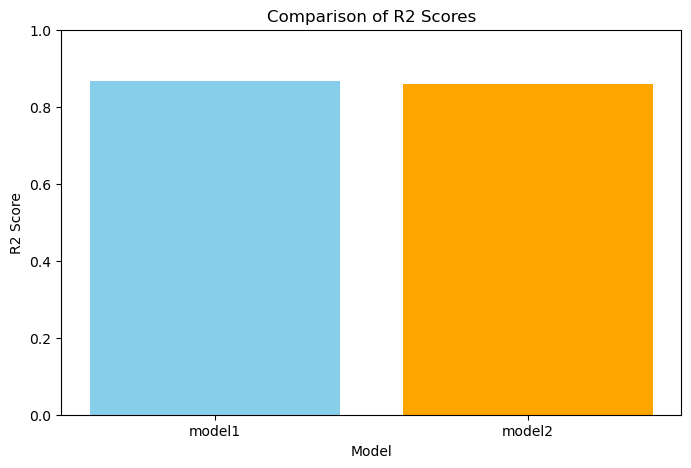

In [35]:
# Create a DataFrame for the R² scores
r2_scores = pd.DataFrame({'Model': ['model1', 'model2'], 'R2 Score': [model1_r2, model2_r2]})

# Print the table
print(r2_scores)

# Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(r2_scores['Model'], r2_scores['R2 Score'], color=['skyblue', 'orange'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores')
plt.ylim(0, 1)
plt.show()

In [36]:
end = time.time()

In [37]:
print(f"The time required is: {(end-start)} seconds")

The time required is: 5.763740539550781 seconds
